In [12]:
!pip install pandas
!pip install numpy
!pip install matplotlib.pyplot
!pip install seaborn


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


<ipython-input-13-c23e5c29b161>:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set [Y_Set == j, 0], X_Set[Y_Set == j, 1],


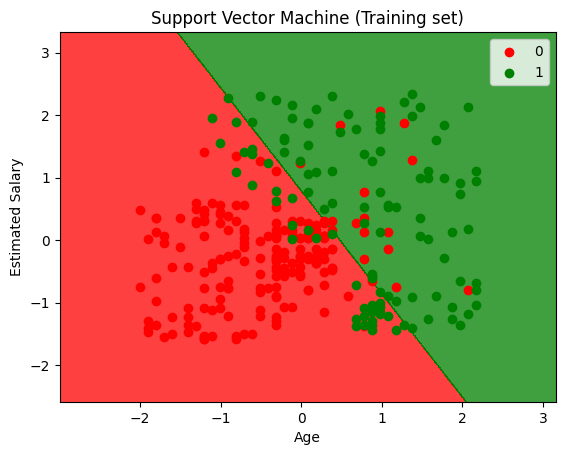

<ipython-input-13-c23e5c29b161>:77: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set [Y_Set == j, 0], X_Set[Y_Set == j, 1], c = ListedColormap (('red', 'green')) (i), label = j)


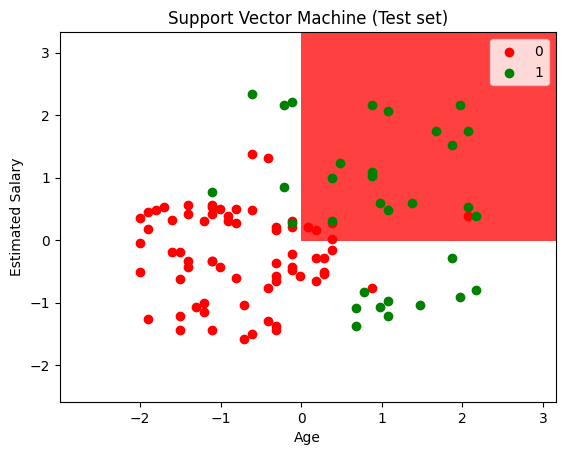

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
# uploaded2 = files.upload()
datasets = pd.read_csv("Social_Network_Ads.csv")
X = datasets.iloc[: , [2,3]].values
Y = datasets.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size = 0.25, random_state= 0)

# Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test= sc_X.transform(X_Test)

# Fitting the Classfier into training test
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

# predict the test result

Y_Pred = classifier.predict(X_Test)

# Confusing Matrix
from matplotlib.colors import ListedColormap


X_Set, Y_Set = X_Train, Y_Train

X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1,stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1. shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate (np.unique (Y_Set)):
  plt.scatter(X_Set [Y_Set == j, 0], X_Set[Y_Set == j, 1],

c = ListedColormap (('red', 'green')) (i), label = j)

plt.title('Support Vector Machine (Training set)')

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()

plt.show()

# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test

X1, X2 = np.meshgrid (np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1. shape),

plt.contourf(X1, alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique (Y_Set)):
  plt.scatter(X_Set [Y_Set == j, 0], X_Set[Y_Set == j, 1], c = ListedColormap (('red', 'green')) (i), label = j)

plt.title('Support Vector Machine (Test set)')

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()

plt.show()